# Sensitivity to roughness lengths
* Last updated 9/28/23* Timothy Juliano (NCAR/RAL) and Andrew Ackerman and Ann Fridlind (NASA/GISS)* Special thanks to Dmitry Chechin (Obukhov Institute of Atmospheric Physics) for motivating this work

## Hypothesis
* Momentum (z0) and scalar [temperature and moisture (z0t and z0q)] roughness length formulations impact CAO cloud evolution through surface momentum and heat fluxes because these events are strongly surface-forced

## Approach
* Test 3 sets of formulations and derive reasonable set for COMBLE-MIP
* Many formulations exist for z0, z0t, and z0q; here, we explore just a few of the more well-known formulations
1. Momentum roughness length (z0): \
-> Functional form and a2 from Charnock (1955, QJRMS) and Smith (1988, JGR) \
-> a1 from COARE 3.5/Edson et al. (2013 JPO) (eq. 13, assuming 10 m wind speed = 12 m/s)

![Momentum Roughness Length](../../figures/z0m_eq.png)

where a1 = 0.0154, a2 = 0.11, u* is friction velocity, g is acceleration due to gravity, and ν is kinematic viscosity

2. Scalar roughness lengths (z0t and z0q): \
-> Functional form from Fairall et al. (2003, JC) (eq. 28) \
-> Equation is valid for both z0t and z0q

![Scalar Roughness Length](../../figures/z0t_q_eq.png)

where Rr is the roughness Reynolds number, Rr = z0 x u* / ν

## Sensitivities
1. *z0_1*: Compute z0, z0t, and z0q according to above equations/constants
2. *z0_2*: Compute z0 according to above equations/constants and set z0t = z0q = 0.1*z0
3. *z0_3*: Set z0, z0t, and z0q according to CONSTRAIN intercomparison case (z0 = 6.6 x 10^-4; z0t = z0q = 3.7 x 10^-6)
4. *z0_4*: Compute constant z0, z0t, and z0q values from *z0_1* for COMBLE-MIP case (z0 = 9.0 x 10^-4; z0t = z0q = 5.5 x 10^-6)

In [31]:
%run functions_plotting.py

In [32]:
## select simulations to plot
sim_keyword = 'z0'

## load ERA5 fields
era5_1d, era5_2d = load_era5(PATH='../../data_files/')

## load radiosondes
rs_dat = load_rs(t_filter = 6.)

## load DOE ARM site statistics
aeri_dat = load_aeri(t_filter = 0.5)

## load MAC-LWP
maclwp_dat = load_maclwp(t_filter = 0.) 
gongiwp_dat = load_iwpgong(t_filter = 0.)

## load CALIPSO retrievals (note the increased time window)
calipso_dat = load_calipso(t_filter = 3.)

../../data_files/theta_temp_rh_sh_uvw_sst_along_trajectory_era5ml_28h_end_2020-03-13-18.nc
../../data_files/anxsondewnpnM1.b1.20200313.172600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.232200.cdf
../../data_files/anxsondewnpnM1.b1.20200313.052700.cdf
../../data_files/anxsondewnpnM1.b1.20200313.112600.cdf


In [33]:
## define (thermo-)dynamical variables that we want to plot
## 1-d variables (time)
var_vec_1d = ['hfss','hfls','ustar','z0','z0t','z0q']
## hfss ---> sfc sensible heat flux (W/m2)
## hfls ---> sfc latent heat flux (W/m2)
## ustar --> sfc friction velocity (m/s)
## z0 -----> momentum roughness length (m)
## z0t ----> temperature roughness length (m)
## z0q ----> moisture roughness length (m)

## 2-d variables (time,height)
var_vec_2d = ['theta','qv','ua','va']
## theta --> potential temperature (K)
## qv -----> water vapor mixing ratio (kg/kg)
## ua -----> zonal wind speed (m/s)
## va -----> meridional wind speed (m/s)

## load select variables from all simulations located in subfolders of the given directory
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword)

../../output_les/wrf/sandbox/z0_3/WRF_LES_COMBLE-I_sens3.nc
../../output_les/wrf/sandbox/z0_4/WRF_LES_COMBLE-I_sens4.nc
../../output_les/wrf/sandbox/z0_2/WRF_LES_COMBLE-I_sens2.nc
../../output_les/wrf/sandbox/z0_1/WRF_LES_COMBLE-I_sens1.nc
../../output_les/wrf/sandbox/z0_3/WRF_LES_COMBLE-I_sens3.nc
../../output_les/wrf/sandbox/z0_4/WRF_LES_COMBLE-I_sens4.nc
../../output_les/wrf/sandbox/z0_2/WRF_LES_COMBLE-I_sens2.nc
../../output_les/wrf/sandbox/z0_1/WRF_LES_COMBLE-I_sens1.nc


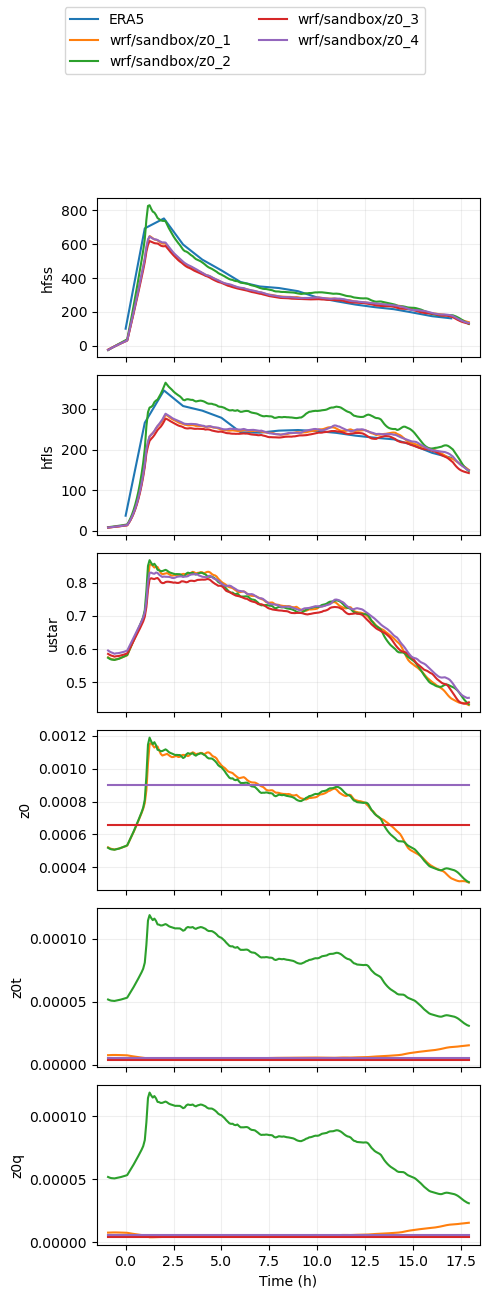

In [34]:
## plot the 1-d variables
plot_1d(pd.concat([df_col_1d,era5_1d]),var_vec_1d,t0=-1.,t1=18.)

Computing wind speed
Computing wind direction


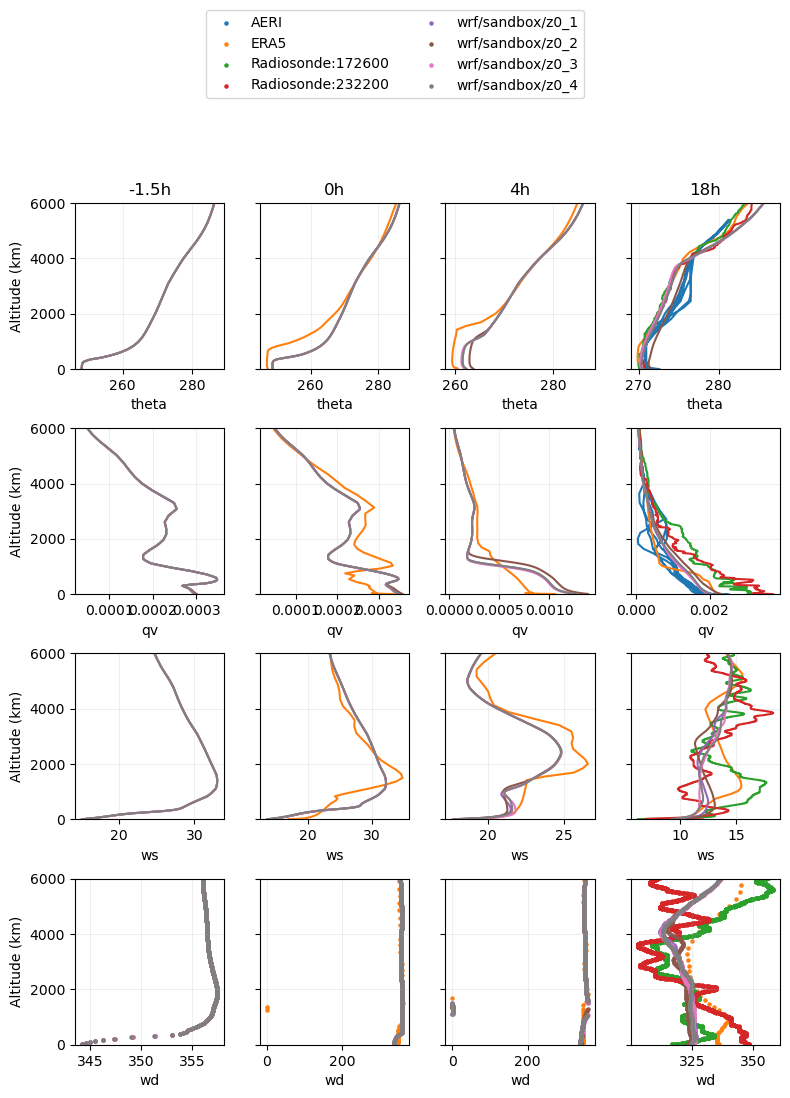

<Figure size 1000x600 with 0 Axes>

In [35]:
## plot the 1-d variables, plus ERA5 and radiosondes at Andenes
plot_2d(pd.concat([df_col_2d,era5_2d,rs_dat,aeri_dat]),var_vec = ['theta','qv','ws','wd'],times=[-1.5,0,4,18],z_max=6000)

In [36]:
## define cloud variables that we want to plot
var_vec_1d = ['lwp','iwp'] # variables without ERA5 (shorter time axis)

## load select variables from all simulations located in subfolders of the given directory
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword)

../../output_les/wrf/sandbox/z0_3/WRF_LES_COMBLE-I_sens3.nc
../../output_les/wrf/sandbox/z0_4/WRF_LES_COMBLE-I_sens4.nc
../../output_les/wrf/sandbox/z0_2/WRF_LES_COMBLE-I_sens2.nc
../../output_les/wrf/sandbox/z0_1/WRF_LES_COMBLE-I_sens1.nc
../../output_les/wrf/sandbox/z0_3/WRF_LES_COMBLE-I_sens3.nc
../../output_les/wrf/sandbox/z0_4/WRF_LES_COMBLE-I_sens4.nc
../../output_les/wrf/sandbox/z0_2/WRF_LES_COMBLE-I_sens2.nc
../../output_les/wrf/sandbox/z0_1/WRF_LES_COMBLE-I_sens1.nc


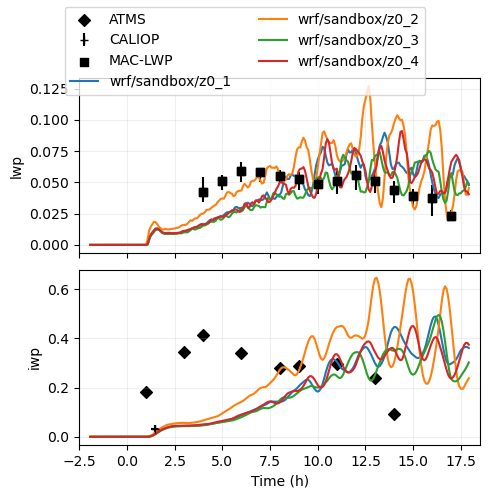

In [37]:
## plot LWP and IWP
plot_1d(pd.concat([df_col_1d,maclwp_dat,calipso_dat,gongiwp_dat]),['lwp','iwp'])